<a href="https://colab.research.google.com/github/Yoomichaella/Study/blob/main/Chapter1_LienarRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
# 랜덤한 값을 만들어보자.
#np.random.seed(0) # 0번 째 값으로 고정
np.random.normal(0.0, 0.5) # 첫번째 : 평균, 두번째 : 표준편차

-0.33514590030214103

In [3]:
npoints = 10
points = list()
# 직선을 만들어보자. 기울기 0.2, y절편 0.5
for i in range(npoints):
  np.random.seed(i)
  x = np.random.normal(0.0, 0.5)
  y = 0.2 * x + 0.5
  points.append([x, y])
print(points)

[[0.882026172983832, 0.6764052345967664], [0.8121726818316208, 0.6624345363663242], [-0.2083789237027353, 0.45832421525945294], [0.8943142367151593, 0.6788628473430318], [0.025280853571469777, 0.505056170714294], [0.22061374344252072, 0.5441227486885042], [-0.1558918367437583, 0.4688216326512483], [0.845262851900178, 0.6690525703800356], [0.045602358309909885, 0.5091204716619819], [0.0005542773561054866, 0.5001108554712211]]


In [4]:
import matplotlib.pyplot as plt

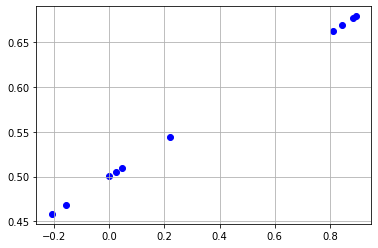

In [5]:
plt.figure(1)
for point in points:
  plt.scatter(point[0], point[1], c='b')
plt.grid()

In [6]:
npoints = 100
points = list()
# 잔차가 있는 데이터를 만들어보자. 기울기 0.2, y절편 0.5
for i in range(npoints):
  np.random.seed(i)
  x = np.random.normal(0.0, 0.5)
  r = np.random.normal(0.0, 0.05)
  y = 0.2 * x + 0.5 + r
  points.append([x, y])

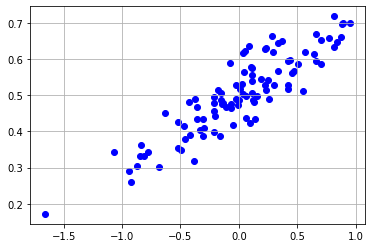

In [7]:
plt.figure(1)
for point in points:
  plt.scatter(point[0], point[1], c='b')
plt.grid()

In [8]:
import torch

In [9]:
dataset = torch.FloatTensor(points) # FloatTensor : 실수형의 tensor(배열)

In [10]:
print(dataset.size())

torch.Size([100, 2])


In [11]:
x = dataset[:, 0] # :은 All이란 뜻, 0번째만 모아서 ,x만 있다.
y = dataset[:, 1] # y만 있다.

In [12]:
print(x.size())

torch.Size([100])


In [13]:
x = x.unsqueeze(1)
print(x.size())

torch.Size([100, 1])


In [14]:
y = y.unsqueeze(1)
print(y.size())

torch.Size([100, 1])


In [15]:
# 기울기를 설정해보자.
a = torch.randn(1, requires_grad=True) #requires_grad : a값을 변화시킬 것이다.
print(a)

tensor([0.0418], requires_grad=True)


In [16]:
# 편차(bias)를 설정해보자.
b = torch.zeros(1, requires_grad = True)
print(b)

tensor([0.], requires_grad=True)


In [ ]:
# 예측을 해보자
y_pred = a * x + b
print(y_pred)

In [18]:
# 오차를 구해보자 / mean squared error(오차의 제곱을, 더해서, 평균)
error = torch.mean((y - y_pred) ** 2)

In [19]:
print(error)

tensor(0.2609, grad_fn=<MeanBackward0>)


In [20]:
# 기울기와 편차를 업데이트해주자
optimizer = torch.optim.SGD([a, b], lr = 0.01)

In [21]:
optimizer.zero_grad() # gradient(순간변화율) 초기화
error.backward() # gradient 계산
optimizer.step()

In [23]:
for i in range(10):
  y_pred = a * x + b
  error = torch.mean((y - y_pred) ** 2)
  optimizer.zero_grad() 
  error.backward() 
  optimizer.step()
print(a)


tensor([0.0512], requires_grad=True)
